# MS2
- Make a Data Exploration notebook giving
  - some visualization of the data
  - some descriptive statistics (including biases in labels)
  - explain what you are doing in text cells.
- Discuss missing, imbalanced, or sparse data problems.



In [ ]:
# Imports
import pandas as pd
from datetime import datetime
import seaborn as sns
import os
import gdown

**Our selected features**

In [ ]:
included_columns = ["CASE_STATUS", "RECEIVED_DATE", "DECISION_DATE", "EMPLOYER_STATE_PROVINCE", "EMPLOYER_CITY", "WORKSITE_STATE", "WORKSITE_CITY", "COUNTRY_OF_CITIZENSHIP", "EMPLOYER_NUM_EMPLOYEES"]

**Loading pickled datasets**

In [ ]:
file_id_full = "1wVHHFxZJ8AWwwXeD2BQs545AKZfwmlHN"
full_datapath = "cleaned_full_data.pkl"
if not os.path.exists(full_datapath):
    print("Downloading data from Google Drive...")
    gdown.download(f"https://drive.google.com/uc?id={file_id_full}", full_datapath, quiet=False)

In [ ]:
file_id_debug = "1unv0Ex9GueuHlzKtZlShdOcBs5xIIs7b"
debugging_datapath = "cleaned_debugging_data.pkl"
if not os.path.exists(debugging_datapath):
    print("Downloading data from Google Drive...")
    gdown.download(f"https://drive.google.com/uc?id={file_id_debug}", debugging_datapath, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1unv0Ex9GueuHlzKtZlShdOcBs5xIIs7b
To: /content/cleaned_debugging_data.pkl
100%|██████████| 6.77M/6.77M [00:00<00:00, 42.7MB/s]


In [ ]:
debugging_data = pd.read_pickle(debugging_datapath)[included_columns]
debugging_data['CASE_APPROVAL_LENGTH'] = debugging_data['DECISION_DATE'] - debugging_data['RECEIVED_DATE']

In [ ]:
print(debugging_data.shape)
print(debugging_data)
print(debugging_data.columns)

(5329, 10)
              CASE_STATUS RECEIVED_DATE DECISION_DATE EMPLOYER_STATE_PROVINCE  \
36462           Withdrawn    2021-03-29    2022-01-27              CALIFORNIA   
31075   Certified-Expired    2021-08-16    2022-01-11              CALIFORNIA   
5884    Certified-Expired    2020-12-03    2021-10-25                NEW YORK   
46059   Certified-Expired    2021-09-03    2022-02-25                ILLINOIS   
101549          Withdrawn    2022-03-14    2022-09-21                NEW YORK   
...                   ...           ...           ...                     ...   
16448   Certified-Expired    2021-06-28    2021-11-24                 GEORGIA   
86565           Certified    2021-12-10    2022-07-19              CALIFORNIA   
73043           Certified    2021-11-04    2022-05-19                NEW YORK   
73881           Certified    2021-11-03    2022-05-23              CALIFORNIA   
87155           Certified    2021-09-02    2022-07-21              WASHINGTON   

        EMPLOYER

In [ ]:
full_data = pd.read_pickle(full_datapath)[included_columns]
full_data['CASE_APPROVAL_LENGTH'] = full_data['DECISION_DATE'] - full_data['RECEIVED_DATE']

In [ ]:
print(full_data.shape)
print(full_data)
print(full_data.columns)

(104600, 10)
              CASE_STATUS RECEIVED_DATE DECISION_DATE EMPLOYER_STATE_PROVINCE  \
0       Certified-Expired    2021-04-22    2021-10-01                NEW YORK   
1       Certified-Expired    2021-04-20    2021-10-01                ILLINOIS   
2       Certified-Expired    2020-11-16    2021-10-01                NEW YORK   
3       Certified-Expired    2021-04-16    2021-10-01           MASSACHUSETTS   
4       Certified-Expired    2021-04-13    2021-10-01              CALIFORNIA   
...                   ...           ...           ...                     ...   
104595             Denied    2022-01-29    2022-09-30                OKLAHOMA   
104596             Denied    2022-01-29    2022-09-30                OKLAHOMA   
104597             Denied    2022-01-29    2022-09-30                OKLAHOMA   
104598             Denied    2022-01-26    2022-09-30               WISCONSIN   
104599             Denied    2022-01-26    2022-09-30              NEW JERSEY   

        EMPLOY

In [ ]:
print(debugging_data['CASE_STATUS'].drop_duplicates())

36462            Withdrawn
31075    Certified-Expired
60435            Certified
11447               Denied
Name: CASE_STATUS, dtype: object


**Seeing how the employee's country of origin affects their final case outcome.**

<Axes: xlabel='COUNTRY_OF_CITIZENSHIP'>

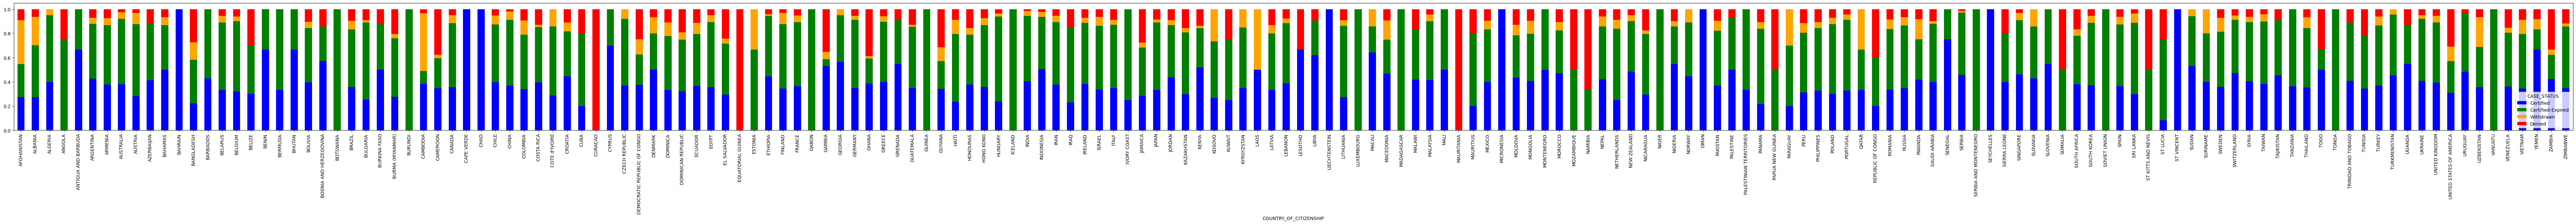

In [ ]:
df1 = full_data.groupby(['COUNTRY_OF_CITIZENSHIP', 'CASE_STATUS'])['COUNTRY_OF_CITIZENSHIP'].count().unstack('CASE_STATUS').fillna(0)
df1['Total'] = df1.sum(axis=1, numeric_only=True)
df1[['Certified', 'Certified-Expired', 'Withdrawn', 'Denied']].div(df1['Total'], axis=0).plot(kind='bar', stacked=True, figsize=(100,5), color=['blue', 'green', 'orange', 'red'])

**Seeing if the number of employees the employer already has has any correlation with the time it takes to receive a response and the case status.**

<ipython-input-13-7d9d93685478>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CASE_APPROVAL_LENGTH'] = df2['CASE_APPROVAL_LENGTH'].apply(getDays)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


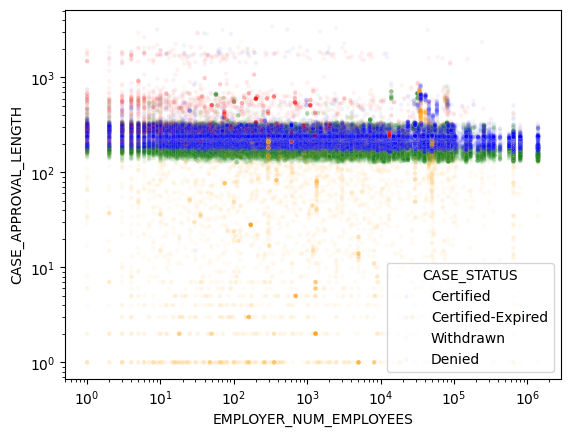

In [ ]:
def getDays(datetime_val):
    return datetime_val.days
df2 = full_data[['EMPLOYER_NUM_EMPLOYEES', 'CASE_APPROVAL_LENGTH', 'CASE_STATUS']]
df2['CASE_APPROVAL_LENGTH'] = df2['CASE_APPROVAL_LENGTH'].apply(getDays)
grid = sns.scatterplot(data=df2, x='EMPLOYER_NUM_EMPLOYEES', y='CASE_APPROVAL_LENGTH', s=10, alpha=0.05, hue='CASE_STATUS',
                palette=['blue', 'green', 'orange', 'red'], hue_order=['Certified', 'Certified-Expired', 'Withdrawn', 'Denied'],)
grid.axes.set_xscale('log')
grid.axes.set_yscale('log')

**Collect descriptive statistics**

In [ ]:
total = len(full_data)
statuses = full_data.groupby('CASE_STATUS', group_keys=False).count().max(axis=1)
fraction = full_data.groupby('CASE_STATUS', group_keys=False).count().max(axis=1).div(total)
avg_time = full_data.groupby('CASE_STATUS')['CASE_APPROVAL_LENGTH'].mean()

In [ ]:
print(total)

104600


In [ ]:
print(statuses)

CASE_STATUS
Certified            40462
Certified-Expired    54023
Denied                4573
Withdrawn             5542
dtype: int64


In [ ]:
print(fraction)

CASE_STATUS
Certified            0.386826
Certified-Expired    0.516472
Denied               0.043719
Withdrawn            0.052983
dtype: float64


In [ ]:
print(avg_time)

CASE_STATUS
Certified           230 days 16:47:22.845138648
Certified-Expired   192 days 07:32:12.443588844
Denied              394 days 12:09:36.251913404
Withdrawn           113 days 17:29:43.760375316
Name: CASE_APPROVAL_LENGTH, dtype: timedelta64[ns]


**Discussion of data issues.**

In [ ]:
full_data.count()

,0
CASE_STATUS,104600
RECEIVED_DATE,104600
DECISION_DATE,104600
EMPLOYER_STATE_PROVINCE,104600
EMPLOYER_CITY,104600
WORKSITE_STATE,104593
WORKSITE_CITY,104598
COUNTRY_OF_CITIZENSHIP,104595
EMPLOYER_NUM_EMPLOYEES,104576
CASE_APPROVAL_LENGTH,104600


Data preprocessing was done in the **Data Extraction** notebook. As can be seen, this data is very complete. We have both labels for each data
point. We also have features for over 99.9% of the data points, so we can ignore
the points we do not have while still having representative data.